# Introduction:

We will be working with a dataset composed of images of hands making a number in different positions, our goal is to be able via an image of a hand indicationg a certain number to recognize that number with a good level of accuracy. 

This will help make machines more sign language friendly. You can find the dataset used for this tutorial in the following link:

https://www.kaggle.com/koryakinp/fingers

The dataset contains 21600 128x128 images of hands making a number sign. 
The train data contains 18000 images and the test data contains 3600 images.

But before getting into business let's do a little warm-up with Tensorflow and explore its main functionalities.

In [9]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops
import pandas as pd

## Tensorflow quick initialization:

We will use tensorflow in the next section to calculate usual stuff we calculate in ML using the tensorflow to get used to it. This is not an attempt to reinvent the wheel (since Tensorflow contains functions that does most of the ML model building, training and testing), but seems like a good way to get used to the dataflow pradigm. So without further ado let's get into it: 

In [4]:
# We'll start by implementing the square difference loss function. 

y_hat = tf.constant(36, name='y_hat')            # y_hat Set to 36.
y = tf.constant(39, name='y')                    # y Set to 39

loss = tf.Variable((y - y_hat)**2, name='loss')  # Create a variable for the loss

init = tf.global_variables_initializer()         # Creates an initaializer to be run in the session,
                                                 # by defining the operations to do, and the variables we are creating
                                                 # a computation graph, this latter can be computed fully or partially using
                                                 # a Tensorflow session.
with tf.Session() as session:                    # Create a session and print the output
    session.run(init)                            # Initializes the variables
    print(session.run(loss))                     # Prints the loss

Instructions for updating:
Colocations handled automatically by placer.
9


To sum it up:
Writing and running programs in TensorFlow has the following steps:

1. Create Tensors (variables) that are not yet executed/evaluated.
2. Write operations between those Tensors.
3. Initialize your Tensors.
4. Create a Session.
5. Run the Session. This will run the operations you'd written above.


Next, we'll introduce placeholders. A placeholder is an object whose value you can specify only later. To specify values for a placeholder, you can pass in values by using a "feed dictionary" (feed_dict variable).

In [6]:
# Example: This is generally used for creating the later initialization of batches for a learning algorithm.
x = tf.placeholder(tf.int64, name = 'x')
sess=tf.Session()
print(sess.run(2 * x, feed_dict = {x: 3}))
sess.close()

6


Okay, now let's use Tensorflow powerfull tools to do this mini computer-vision project.

In [17]:
input_file = "C:/Users/YsfEss/Desktop/train_signs.h5"
with h5py.File(input_file,'r') as hdf:
    ls=list(hdf.keys())
    xl=hdf.get('train_set_x')
    yl=hdf.get('train_set_y')
    cl=hdf.get('list_classes')
    imgs=np.array(xl)
    labels=np.array(yl)
    classes=np.array(cl)
print(ls)
print(imgs.shape,labels.shape,classes.shape)

['list_classes', 'train_set_x', 'train_set_y']
(1080, 64, 64, 3) (1080,) (6,)


2


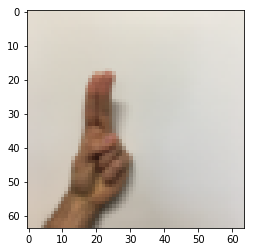

In [19]:
index=10
print(classes[labels[index]])
plt.imshow(imgs[index])

In [20]:
n=imgs.shape[0] # Number of observations.
p=imgs.shape[1]*imgs.shape[2]*imgs.shape[3] # Number of attributes/features.
data=imgs.reshape(n,p)
TrData=pd.DataFrame(data=data)
# Neural network means we have to normalize our data by deviding each entry by 255.
TrData=TrData.applymap(lambda x:x/255)
labels=pd.DataFrame(data=labels,columns=['CLASS'])
TrData=pd.concat([TrData,labels],axis=1)
TrData.head()

,0,1,2,3,4,5,6,7,8,9,...,12279,12280,12281,12282,12283,12284,12285,12286,12287,CLASS
0,0.890196,0.862745,0.839216,0.890196,0.866667,0.843137,0.890196,0.870588,0.843137,0.890196,...,0.819608,0.823529,0.823529,0.819608,0.823529,0.819608,0.815686,0.819608,0.819608,5
1,0.933333,0.909804,0.874510,0.933333,0.909804,0.874510,0.933333,0.909804,0.874510,0.929412,...,0.839216,0.796078,0.760784,0.843137,0.796078,0.760784,0.843137,0.800000,0.752941,0
2,0.894118,0.862745,0.815686,0.894118,0.862745,0.815686,0.890196,0.858824,0.815686,0.890196,...,0.815686,0.800000,0.784314,0.823529,0.807843,0.788235,0.827451,0.811765,0.792157,2
3,0.894118,0.858824,0.815686,0.898039,0.858824,0.815686,0.894118,0.862745,0.815686,0.890196,...,0.780392,0.760784,0.760784,0.784314,0.764706,0.756863,0.788235,0.768627,0.756863,5
4,0.882353,0.850980,0.800000,0.882353,0.854902,0.803922,0.882353,0.854902,0.807843,0.882353,...,0.803922,0.792157,0.788235,0.792157,0.780392,0.776471,0.780392,0.764706,0.752941,2
